# $\color{purple}{1) \; \text{Radioactivity problem }}$ 

---

We have an emmiter of decaying particles and are measuring the probability in the range $x=(1,20)$ from the emmiter.

$$P_{\lambda}(x)= \begin{cases} \frac{e^{-\frac{x}{\lambda}}}{Z(\lambda)}; \qquad &if \quad x\in(1,20),\\0; \qquad &otherwise. \end{cases}$$


## $\color{purple}{\text{Question 1}}$ 
--- 



### $\color{purple}{\text{1a)}}$ ###

--- 
Compute $Z(\lambda)$ such that the probability distribution is normalized 




\begin{align}
    Z(\lambda) &=  \int_1^{20} dx \, e^{\frac{-x}{\lambda}} \\ 
    &= \lambda \int_{z_1}^{z_2} dz \,e^{-z}   \,\,\,\, \textit{with} \,\, \, z = \frac{x}{\lambda} \\
    &= \lambda [e^{\frac{-1}{\lambda}} - e^{\frac{-20}{\lambda}}]
\end{align}





### $\color{purple}{\text{1b)}}$ 
--- 
Show that ${\mathbb E}[X]=\lambda^2 \partial_{\lambda} \log Z(\lambda)$


\begin{align}
    \partial_{\lambda} \log(Z(\lambda)) &= \frac{1}{Z(\lambda)} \partial_{\lambda}Z(\lambda)  \\
    &= \frac{1}{Z(\lambda)}\partial_{\lambda}\int_1^{20}dx \, e^{\frac{-x}{\lambda}} \\
    &= \frac{1}{Z(\lambda)}\int_{1}^{20}dx \,\frac{x}{\lambda^2} e^{\frac{-x}{\lambda}}\\
    &= \frac{1}{\lambda^2}\mathbb{E}[x]
\end{align}

### $\color{purple}{\text{1c)}}$ 
--- 


Show ${\rm var}[X]= \lambda^2  \partial_{\lambda} {\mathbb E}[X]$

\begin{align}
    \partial_{\lambda} \mathbb{E}[x] &= \partial_{\lambda}{\frac{1}{Z(\lambda)}\int_1^{20}dx /, xe^{\frac{-x}{\lambda}}} \\
    &= \frac{Z(\lambda)\frac{1}{\lambda}^2 \int_1^{20}x^2e^{\frac{-x}{\lambda}}  \,\, - \partial_{\lambda}Z(\lambda)\int_1^{20}dx\, xe^{\frac{-x}{\lambda}}
    }{Z(\lambda)^2} \\
    &= \frac{\mathbb{E}[x]}{\lambda^2} -\frac{1}{\lambda^2}\mathbb{E}[x]\partial_{\lambda}\log(Z(\lambda)) \\
    &= \frac{V[x]}{\lambda^2}
\end{align}

### $\color{purple}{\text{1d)}}$ 
--- 


 Compute and plot the mean as a function of $\lambda$

\begin{align}
    \mu(\lambda) &= \mathbb{E}[x;\lambda]\\
    &= \lambda^2 \partial_{\lambda} \log Z(\lambda) \\
    &= \frac{-20 -\lambda +e^{\frac{19}{\lambda}}(1+\lambda)}{e^{\frac{19}{\lambda}}-1}
\end{align}
I will use the simpler software for plotting which is Wolfram|Alpha

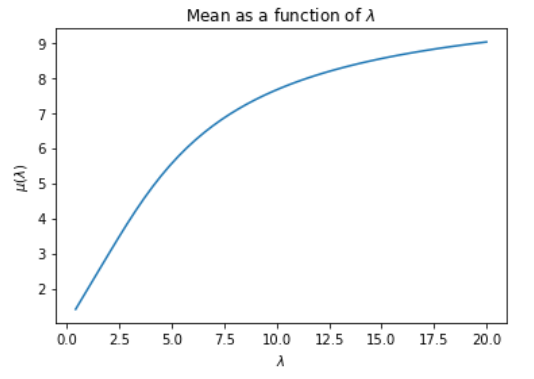

### $\color{purple}{\text{1e)}}$ 
--- 


 Compute and plot the variance as a function of $\lambda$

 \begin{align}
    \Delta(\lambda) &= V[x;\lambda]\\
    &= \lambda^2 \partial_{\lambda} \mathbb{E}[x;\lambda] \\
    &= \frac{-361e^{\frac{19}{\lambda}}+(1-e^{\frac{19}{\lambda}})^2\lambda^2}{(-1+e^{\frac{19}{\lambda}})^2}
\end{align}

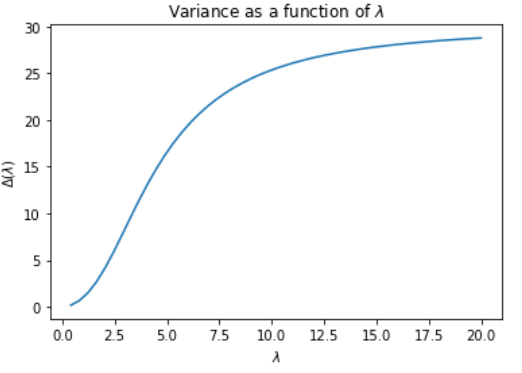

## $\color{purple}{\text{Question 2}}$ 
--- 



 What is the probability $P_{\lambda}(\left\{x_i\right\}_{i=1}^n)$ to observe a set of $n$ events at position $\left\{x_i\right\}_{i=1}^n$? 


What is the log-likelihood function ${\cal L}(\lambda,\left\{x_i\right\}_{i=1}^n)) = \log(
P_{\lambda}(\left\{x_i\right\}_{i=1}^n) /n$ ?

$P_{\lambda}(\left\{x_i\right\}_{i=1}^n)= \prod_{i=1}^n P_{\lambda}(x_i) =   \prod_{i=1}^n e^{\frac{-x_i}{\lambda}}$



${\cal L}(\lambda,\left\{x_i\right\}_{i=1})=\frac{1}{n}\sum_{i=1}^n\frac{-x_i}{\lambda} - \log (Z(\lambda))$

## $\color{purple}{\text{Question 3}}$ 
--- 



### $\color{purple}{\text{3a)}}$ 
--- 
Write a program that simulates $n$ such observations sampled from the probability distribution for a fixed $\lambda$.


We can simply use the *np.random* function and reject all the values which does not fall in the interval $[1,20]$.

In [ ]:
def dist(lam,N):
  count = 0 ; data = []
  while True:
    aux = np.random.exponential(lam)
    if aux<20 and aux>1:
      count+=1
      data.append(aux)
    if count==N:
      break
  return data

We will exploit a more clever method which is called the $\textbf{"Inverse transform sampling"}$. 

Let's define the problem: we would like to generate the datapoint $x \sim P_{\lambda}$ by using an uniform variable $u \sim U([0,1))$. By assuming some regularity on the CDF, i.e. invertibility, we can sample $x \sim P_{\lambda}$ by simply computing: $ x = F^{-1}(u) $ where $ u \sim U([0,1)) $

Specializing in our case the workflow reads: 
* Extract $u \in[0,1)$ from uniform distribution $\mathcal{U}([0,1))$ 
* $x=20-\lambda \log\left[\exp(19/\lambda)+u(1-\exp(19/\lambda))\right]$



In [ ]:
# Sampler from the distribution
def dist(lam,N,seed):
  np.random.seed(seed)
  return 20.-lam*np.log(np.exp(19./lam)+np.random.random(N)*(1.-np.exp(19./lam)))

### $\color{purple}{\text{3b)}}$ 
--- 
Choose the true value to be $\lambda^*=10$.

 Generate $n=10$ observations. 
 
 Plot the likelihood as a function of $\lambda$. 
 
 Repeat for $n=20,100$ and discuss what you see.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
# We will optimize the loglikelyhood with scipy.optimize
import scipy.optimize as so

In [ ]:
def pdist(lam,xi):
    return np.exp(-xi/lam)/(lam*(np.exp(19./lam)-1.)*np.exp(-20./lam))

# Log-likelyhood
def loglh(lam,x):
    return sum(np.log(pdist(lam,x)))
    

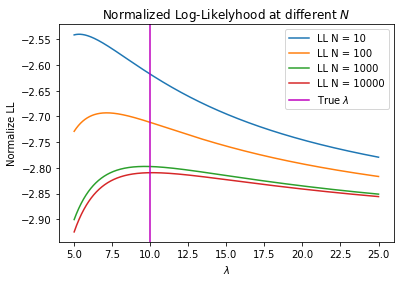

In [ ]:
lam = 10
Ns = [10,100,1000,10000] 
tab_lam = np.linspace(5,25,1000)
funcs = [] ; i=-1 ; x = []
for N in Ns:
  i += 1 ; x.append(dist(lam,N,seed=1926))
  f = lambda y: loglh(y,x[i])
  # Normalized log-likelyhood
  fs = [f(lam)/N for lam in tab_lam] 
  funcs.append(fs)
  plt.plot(tab_lam,fs, label = f"LL N = {N}")
plt.axvline(lam,label="True $\lambda$",c="m")
plt.title('Normalized Log-Likelyhood at different $N$')
plt.xlabel('$\lambda$') ; plt.ylabel("Normalize LL")
plt.legend()
plt.show()


The normalized log-likelyhood is getting more and more peaked around true $\lambda$.


## $\color{purple}{\text{Question 4}}$ 
--- 



Create some data set with $n=10,100,1000$ for different values of $\lambda^*$ between $0$ and $50$ and see how the ML estimator performs.

In [ ]:
tab_lam=np.linspace(5,20,5)
MSEs = []
N_sam=100
Ns = [10,100,1000]
# Loop on possible values of N
for N in Ns:
  MSE=np.zeros(len(tab_lam))
  # Loop on values of half-life
  for i in range(len(tab_lam)):
    # Loop on the number of trials for averaging the MSE 
    for k in range(N_sam):
      seed = np.random.randint(0,10e5)
      x=dist(tab_lam[i],N,seed)
      lamML=so.fmin(lambda y:-loglh(y,x),np.random.uniform(0,20),disp=False)
      # Reject unphysical minima by brute force
      if lamML < 50:
        MSE[i]+=(lamML-tab_lam[i])**2/N_sam
  MSEs.append(MSE)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


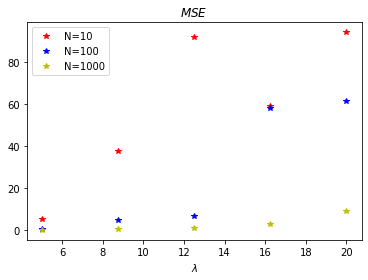

In [ ]:
plt.title('$MSE$')
plt.xlabel('$\lambda$')
plt.plot(tab_lam,MSEs[0],"*",color='r',label="N=10")
plt.plot(tab_lam,MSEs[1],"*",color='b',label="N=100")
plt.plot(tab_lam,MSEs[2],"*",color='y',label="N=1000")
plt.legend() ; plt.show()


## $\color{purple}{\text{Question 5}}$ 
--- 



Show that the Fisher score information in this problem is given by \begin{equation}
I(\lambda) = {\mathbb E} \left[ 
\left(\frac  {\partial}{\partial \lambda} \log 
P_{\lambda}(X)\right)^2 \right] = 
\frac 1{\lambda^4} {\mathbb E} \left[(X - \mathbb{E}[X] )^2\right]
= \frac{{\rm var}[X]}{\lambda^4}    
\end{equation}


Let us develop what is inside the square:

\begin{align}
    \partial_{\lambda}\log(P(\lambda)) &= \partial_{\lambda}(\frac{1}{Z(\lambda)}e^{\frac{-x}{\lambda}}) \\
    &= \partial_{\lambda}(\frac{-x}{\lambda}-\log Z(\lambda))\\
    &= \frac{x-\mathbb{E}[x]}{\lambda^2}
\end{align}


We trivially recover the result once substituting inside the formula for $I(\lambda)$

## $\color{purple}{\text{Question 6-7-8}}$ 
--- 

6) Implement the MAP estimator using Jeffreys prior.

7) Compute the MSE for the two estimator for different n and $\lambda^*$

8) Compare the MSE curves with the Cramer-Rao bound

Let's analyze the comparison of MSE, Cramers-Rao and MAP estimator with Jeffreys prior at different n.


In [ ]:
def fisher(lam):
    return (-19.**2+2.*(lam**2.)*(np.cosh(19./lam)-1.))/(4.*lam**4.*np.sinh(19./(2.*lam))**2.)

def bootstrap_CI(y,B=1000):
  '''
  y : array of original observations // B : #(Bootsrap dataset)
  '''
  # Choose length of each bootstrap dataset equal to original one (Not mandatory)
  n = len(y)
  sample_mean = []
  for _ in range(B):
      sample_n = np.random.choice(y, size=n)
      sample_mean.append(sample_n.mean())
  boot_mean = np.mean(sample_mean) 
  p025 = np.quantile(sample_mean,0.025)
  p975 = np.quantile(sample_mean,0.975)
  return  boot_mean , p025 , p975


### $\color{purple}{\text{N=10}}$ 
--- 

In [ ]:
tab_lam=np.linspace(4,20,5)
MSE=np.zeros(len(tab_lam))  ; MSE_J=np.zeros(len(tab_lam))
errMSE = np.zeros((len(tab_lam),2)) ; errMSE_J = np.zeros((len(tab_lam),2))
N_sam=500
N=10
for i in range(len(tab_lam)):
  store = [] ; storeJ = []
  for k in range(N_sam):
    seed = np.random.randint(0,10e5)
    x=dist(tab_lam[i],N,seed)
    lamML=so.fmin(lambda y:-loglh(y,x),np.random.uniform(0,20),disp=False)[0]
    lamJ=so.fmin(lambda y:-loglh(y,x) - np.log(np.sqrt(fisher(y))),np.random.uniform(0,20),disp=False)[0]
    # REJECT UNPHYSICAL VALUES 
    if lamML < 50:
      store.append((lamML-tab_lam[i])**2)
      storeJ.append((lamJ-tab_lam[i])**2)
  MSE[i] , errMSE[i,0] , errMSE[i,1] = bootstrap_CI(store)
  MSE_J[i] , errMSE_J[i,0] , errMSE_J[i,1] = bootstrap_CI(storeJ)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


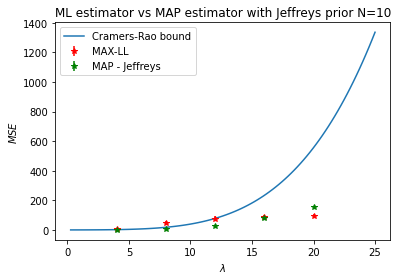

In [ ]:
plt.title(f"ML estimator vs MAP estimator with Jeffreys prior N={N}")
plt.ylabel('$MSE$')
plt.xlabel('$\lambda$')
plt.errorbar(tab_lam,MSE,fmt="*",color='r',label='MAX-LL',yerr=[MSE - errMSE[:,0], errMSE[:,1]-MSE])
plt.errorbar(tab_lam,MSE_J,fmt="*",color='g',label='MAP - Jeffreys',yerr=[MSE_J - errMSE_J[:,0], errMSE_J[:,1]-MSE_J])
tab_l=np.linspace(0.01,25,100)
onI=[1/N/fisher(lam) for lam in tab_l]
plt.plot(tab_l,onI,label="Cramers-Rao bound")

plt.legend() ; plt.show()


### $\color{purple}{\text{N=100}}$ 
--- 

In [ ]:
tab_lam=np.linspace(4,20,5)
MSE=np.zeros(len(tab_lam))  ; MSE_J=np.zeros(len(tab_lam))
errMSE = np.zeros((len(tab_lam),2)) ; errMSE_J = np.zeros((len(tab_lam),2))
N_sam=500
N=10**2
for i in range(len(tab_lam)):
  store = [] ; storeJ = []
  for k in range(N_sam):
    seed = np.random.randint(0,10e5)
    x=dist(tab_lam[i],N,seed)
    lamML=so.fmin(lambda y:-loglh(y,x),np.random.uniform(0,20),disp=False)[0]
    lamJ=so.fmin(lambda y:-loglh(y,x) - np.log(np.sqrt(fisher(y))),np.random.uniform(0,20),disp=False)[0]
    # REJECT UNPHYSICAL VALUES 
    if lamML < 50:
      store.append((lamML-tab_lam[i])**2)
      storeJ.append((lamJ-tab_lam[i])**2)
  MSE[i] , errMSE[i,0] , errMSE[i,1] = bootstrap_CI(store)
  MSE_J[i] , errMSE_J[i,0] , errMSE_J[i,1] = bootstrap_CI(storeJ)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


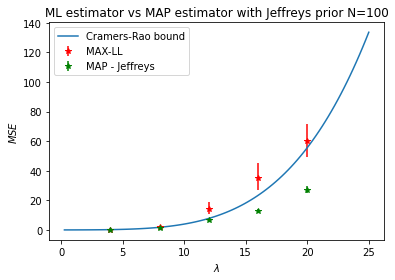

In [ ]:
plt.title(f"ML estimator vs MAP estimator with Jeffreys prior N={N}")
plt.ylabel('$MSE$')
plt.xlabel('$\lambda$')
plt.errorbar(tab_lam,MSE,fmt="*",color='r',label='MAX-LL',yerr=[MSE - errMSE[:,0], errMSE[:,1]-MSE])
plt.errorbar(tab_lam,MSE_J,fmt="*",color='g',label='MAP - Jeffreys',yerr=[MSE_J - errMSE_J[:,0], errMSE_J[:,1]-MSE_J])
tab_l=np.linspace(0.01,25,100)
onI=[1/N/fisher(lam) for lam in tab_l]
plt.plot(tab_l,onI,label="Cramers-Rao bound")

plt.legend() ; plt.show()


### $\color{purple}{\text{N=1000}}$ 
--- 

In [ ]:
tab_lam=np.linspace(4,20,5)
MSE=np.zeros(len(tab_lam))  ; MSE_J=np.zeros(len(tab_lam))
errMSE = np.zeros((len(tab_lam),2)) ; errMSE_J = np.zeros((len(tab_lam),2))
N_sam=500
N=10**3
for i in range(len(tab_lam)):
  store = [] ; storeJ = []
  for k in range(N_sam):
    seed = np.random.randint(0,10e5)
    x=dist(tab_lam[i],N,seed)
    lamML=so.fmin(lambda y:-loglh(y,x),np.random.uniform(0,20),disp=False)[0]
    lamJ=so.fmin(lambda y:-loglh(y,x) - np.log(np.sqrt(fisher(y))),np.random.uniform(0,20),disp=False)[0]
    # REJECT UNPHYSICAL VALUES 
    if lamML < 50:
      store.append((lamML-tab_lam[i])**2)
      storeJ.append((lamJ-tab_lam[i])**2)
  MSE[i] , errMSE[i,0] , errMSE[i,1] = bootstrap_CI(store)
  MSE_J[i] , errMSE_J[i,0] , errMSE_J[i,1] = bootstrap_CI(storeJ)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


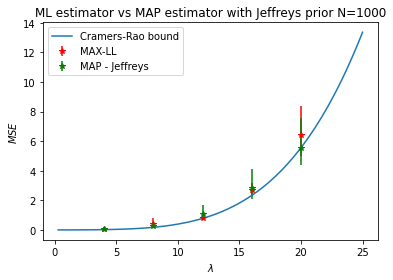

In [ ]:
plt.title(f"ML estimator vs MAP estimator with Jeffreys prior N={N}")
plt.ylabel('$MSE$')
plt.xlabel('$\lambda$')
plt.errorbar(tab_lam,MSE,fmt="*",color='r',label='MAX-LL',yerr=[MSE - errMSE[:,0], errMSE[:,1]-MSE])
plt.errorbar(tab_lam,MSE_J,fmt="*",color='g',label='MAP - Jeffreys',yerr=[MSE_J - errMSE_J[:,0], errMSE_J[:,1]-MSE_J])
tab_l=np.linspace(0.01,25,100)
onI=[1/N/fisher(lam) for lam in tab_l]
plt.plot(tab_l,onI,label="Cramers-Rao bound")

plt.legend() ; plt.show()


## $\color{purple}{\text{Extra: Numerical optimization analysis - Study the outlier }}$ 
---

We optimized many times the Log-likleyhood, though we never explained why we made the assumption about the oracle telling us where we should search our $\lambda$.

If we remove this assumption we can find, especially at low $n$, extremely large values of $\hat{\lambda}_{ML}$  (we could reach $10^8$).

What is happening?

The answer as we will see in a moment lies in numerical difficulties that show up in optimizing the Log-likelyhood which, conditioned on an atypical extraction, is very flat. 

We remember it here that the Log-likelyhood has theoretycally a unique maximum as a function of $\lambda$ (Mathematical-minded people can have fun in showing it easily by introducing $\tau = \frac1{\lambda}$). 

Hence there should be no reason to worry you could tell me...$\textbf{BUT}$ mathematical world is not real life! The optimization algorithm will run away from the actual minimum and will find some local minima, not physical and possibly with very large values.


Let's plot in order to understand this better.

In [ ]:
lam = 20
store_seed = []
store_data = []
funcs = [] ; lam_wrong = []
N_sam=10
N = 10
for k in range(N_sam):
  seed = np.random.randint(0,10e5)
  x=dist(lam,N,seed)
  f = lambda y:-loglh(y,x)
  lamML=so.fmin(f,np.random.uniform(0,20),disp=False)
  # Study unphysical minima less probable as N increase
  if lamML > 10000:
    print(f"The outlier data is x={x} \n")
    # Save the seed of the outlier and the data
    store_seed.append(seed) ; store_data.append(x)
    # Save the -loglh and the wrong estimator found with scipy
    funcs.append(f) ; lam_wrong.append(lamML)

The outlier data is x=[ 7.48067207 19.69686296  4.62799909 11.51105451 17.56073508 13.82556707
 12.45480709 15.65352098  1.34264807  6.16825631] 

The outlier data is x=[17.27167189 14.78216551  1.06751181 19.52072339 14.27142431  8.77043936
 18.62157486  1.91914955 11.267815   13.59018561] 

The outlier data is x=[12.49032246 15.65935655 13.01655563  8.08471543 10.5452301   7.28112057
 16.48276834  8.54639331  1.78038374 15.1787593 ] 



No handles with labels found to put in legend.


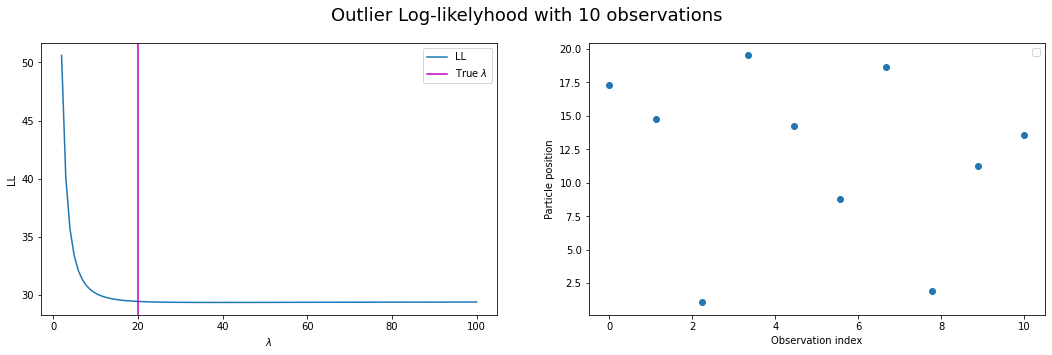

In [ ]:
idx = 1
tab_lam = np.linspace(2,100,100)
fs = [funcs[idx](lam) for lam in tab_lam] 
fig, ax = plt.subplots(1,2, figsize=(18,5))
plt.suptitle(f"Outlier Log-likelyhood with {N} observations", size = 18)
ax[0].plot(tab_lam,fs, label = f"LL")
ax[0].axvline(lam,label="True $\lambda$",c="m")
ax[0].set(xlabel ="$\lambda$" , ylabel = "LL")
ax[1].plot(np.linspace(0,N,N),store_data[idx],"o")
ax[1].set(xlabel ="Observation index" , ylabel = "Particle position")
ax[1].legend(); 
ax[0].legend(); 

# $\color{purple}{2) \; \text{Probability bounds and a pooling problem }}$ 

---

We are going to follow the steps we took in lecture $1$ and prove an interesting inequality:  Let $Z_1,\ldots,Z_m$ be independent random variables such that $Z_i =1$ with probability $p$, and $0$ with probability $1-p$. Then, for any $\epsilon \ge 0$ we have
$$
\mathbb{P}\left(\frac 1m \sum_i Z_i  \ge p + \epsilon \right) \le e^{-2m\epsilon^2}
$$

### $\color{purple}{\text{Question 1:}}$  Using Markov inequality and the proof strategy discussed in lecture 1, show that:
$$
\mathcal{P} \equiv \mathbb{P}\left(\frac 1m \sum_i Z_i  \ge p + \epsilon \right) \le \left(\frac{p e^{\lambda} + (1-p)}{e^{\lambda(p+\epsilon)}}\right)^m
$$

---


We can rewrite

$$
\mathcal{P} = \mathbb{P}\bigg( e^{\lambda \sum_i^mz_i} \geq e^{\lambda m (p+\epsilon)} \bigg)
$$

And using Markov

$$
\mathcal{P} \leq \frac{\mathbb{E}_{z_i}\big[e^{\lambda\sum_i^m z_i}\big]}{e^{\lambda(p+\epsilon)m}} = \frac{\prod_i^m \big[ pe^{\lambda} + (1-p) \big]}{e^{\lambda(p+\epsilon)m}} = \Bigg[ \frac{ pe^{\lambda} + (1-p)}{e^{\lambda(p+\epsilon)}} \Bigg]^m
$$

### $\color{purple}{\text{Question 2:}}$ Using the value of $\lambda$ that minimizes the right-hand side of the former equation, show that
$$
\mathbb{P}\left(\frac 1m \sum_i Z_i  \ge p + \epsilon \right) \le e^{-m f(p,\epsilon)}
$$
### with 
$$
f(p,\epsilon) = -\log \left(\left({\frac {p}{p+\epsilon }}\right)^{p+\epsilon }{\left({\frac {1-p}{1-p-\epsilon }}\right)}^{1-p-\epsilon }\right)
$$


---



---





We derive the expression inside the parentheses found in question 1 to find the extrema:

$$
\frac{\partial }{\partial \lambda} \left(\frac{p e^{\lambda} + (1-p)}{e^{\lambda(p+\epsilon)}}\right)\bigg|_{\overline{\lambda}} = p(1-p-\epsilon)e^{\lambda(-p-\epsilon)}-(1-p)(p+\epsilon)e^{-\lambda(p+\epsilon+1)}\big|_{\overline{\lambda}} = 0
$$

Inverting the expression

$$
e^\overline{\lambda} = \frac{(1-p)(p+\epsilon)}{p(1-p-\epsilon)} \quad \Longrightarrow \quad \overline{\lambda} = \log\bigg( \frac{(1-p)(p+\epsilon)}{p(1-p-\epsilon)}\bigg)
$$

Computing the second derivative and evaluating it at $\overline{\lambda}$ one can check (*see cell below*) that it is indeed a mimimum for every $\epsilon>0$ and every $p \in[0,1-\epsilon]$. Therefore we can write

$$
\mathcal{P} \leq \Bigg[ \frac{ \frac{(1-p)(p+\epsilon)}{1-p-\epsilon} +1 - p}{\Big( \frac{(1-p)(p+\epsilon))}{p(1-p-\epsilon)} \Big)^{p+\epsilon}}\Bigg]^m = \exp\bigg\{-m \log \Bigg[ \frac{\Big( \frac{(1-p)(p+\epsilon))}{p(1-p-\epsilon)} \Big)^{p+\epsilon}}{ \frac{1-p}{1-p-\epsilon}}\Bigg] \bigg\}
$$

Using the properties of the logarithm one can rewrite this expression as 

$$
\mathcal{P} \le e^{-m f(p,\epsilon)}
$$

where

$$
f(p,\epsilon) = (p+\epsilon)\log\bigg( \frac{p+\epsilon}{p} \bigg) + (1-p-\epsilon)\log\bigg( \frac{1-p-\epsilon}{1-p} \bigg)
$$

Which is equivalent to the expression we wanted to prove.

In [ ]:
#Plot to see that the sign of the second derivative is always positive

plt.rcParams["figure.figsize"] = (9, 9)
plt.rcParams["font.size"] = 16

table_p=np.linspace(0,1.,101,endpoint=True)
table_eps=np.linspace(0,0.1,101,endpoint=True)

x, y = np.meshgrid(table_eps, table_p)

Z = np.array([ np.array([ (((1 - p)*(p + eps))/(p*(-p - eps + 1)))**(-p - eps) *(((1 - p)*(p + eps - 1)**2 *(p + eps))/(-p - eps + 1) - (p - 1)*(-p - eps)**2) for eps in table_eps ]) for p in table_p ])

im = plt.imshow(Z, cmap=plt.cm.RdBu , extent=[0,0.1,1,0], aspect='auto')  
#cset = plt.contourf(x,y,Z, linewidths=2, cmap=plt.cm.Set2)
#plt.clabel(cset, inline=True, fmt='%1.3f', fontsize=10)
plt.colorbar(im)  
plt.xlabel(r'$\epsilon$')
plt.ylabel('p')
#plt.xlim(0,0.1)
plt.title('second derivative')
#plt.ylim(0,1)

plt.show()

### $\color{purple}{\text{Question 3:}}$ Show that 
$$
f(p,\epsilon=0)=0,\, \frac {\partial f(p,\epsilon)}{\partial \epsilon} \bigg|_{\epsilon=0} = 0,\text{ and that } \frac {\partial^2 f(p,\epsilon)}{\partial \epsilon^2}  \ge 4~\text{ for any }\epsilon.
$$

The first one is trivial, we have simply $f(p,0) = -\log{1} = 0\,.$

For the second one we can write 
$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon} = \log\Big(\frac{p+\epsilon}{p}\Big) + \frac{p}{p} - \log\bigg( \frac{1-p-\epsilon}{1-p} \bigg) - \frac{1-p}{1-p}
$$
And therefore

$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon}\bigg|_{\epsilon=0} = 0+1-0-1 = 0
$$

For the third one we can comopute the second derivative:

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} = \frac{1}{p+\epsilon} + \frac{1}{1-p-\epsilon} = \frac{1}{(p+\epsilon)(1-(p+\epsilon))}
$$

Calling $x = p + \epsilon$, we see that the second derivative has a minimum at $x= 1/2$, where we have

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2}\Bigg|_{p+\epsilon=1/2} = 4
$$

And from this result the answer to the question follows in a straightforward way.

### $\color{purple}{\text{Question 4:}}$ Use Taylor's theorem (that states that $f(p,\epsilon)=f(p,0)+\epsilon f'(p,0) + \epsilon^2 f''(p,\tilde \epsilon)/2$ for some unknown $\tilde \epsilon$, and where the prime stands for derivative with respect to $\epsilon$) to show that $f(p,\epsilon)\ge2\epsilon^2$, and prove the inequality

Using what we just found, we can simply write

$$
f(p,\epsilon) \geq f(p,0)+\epsilon f'(p,0) + \epsilon^2 \frac{4}{2} = 0 + 0 + 2\epsilon^2
$$

Then, using the result of Question 2 and the fact that the ezponential is a monothonic function, this inequality brings us directly to the final result.

### $\color{purple}{\text{Bonus 1}}$ 

We can rewrite

$$
\mathcal{P_2} = \mathbb{P}\bigg( - \sum_i^mz_i \geq m (\epsilon-p) \bigg) =\mathbb{P}\bigg( e^{-\lambda \sum_i^mz_i} \geq e^{\lambda m (\epsilon-p)} \bigg)
$$

And using Markov

$$
\mathcal{P_2} \leq \frac{\mathbb{E}_{z_i}\big[e^{-\lambda\sum_i^m z_i}\big]}{e^{\lambda(-p+\epsilon)m}} = \frac{\prod_i^m \big[ pe^{-\lambda} + (1-p) \big]}{e^{\lambda(-p+\epsilon)m}} = \Bigg[ \frac{ pe^{-\lambda} + (1-p)}{e^{\lambda(-p+\epsilon)}} \Bigg]^m
$$

We derive the expression inside the parentheses to find the extrema:

$$
\frac{\partial }{\partial \lambda} \left(\frac{p e^{-\lambda} + (1-p)}{e^{\lambda(-p+\epsilon)}}\right)\bigg|_{\overline{\lambda}} = p(-1+p-\epsilon)e^{\lambda(-2+p-\epsilon)}-(1-p)(-p+\epsilon)e^{-\lambda(1-p+\epsilon)}\big|_{\overline{\lambda}} = 0
$$

Inverting the expression

$$
e^{-\overline{\lambda}} = \frac{(1-p)(p-\epsilon)}{p(1-p+\epsilon)} \quad \Longrightarrow \quad \overline{\lambda} = -\log\bigg( \frac{(1-p)(p-\epsilon)}{p(1-p+\epsilon)}\bigg)
$$

Computing the second derivative and evaluating it at $\overline{\lambda}$ one can check that it is indeed a mimimum for every $\epsilon>0$ and every $p \in[0,1-\epsilon]$. Therefore we can write

$$
\mathcal{P_2} \leq \Bigg[ \frac{ \frac{(1-p)(p-\epsilon)}{1-p+\epsilon} +1 - p}{\Big( \frac{(1-p)(p-\epsilon))}{p(1-p+\epsilon)} \Big)^{p-\epsilon}}\Bigg]^m = \exp\bigg\{-m \log \Bigg[ \frac{\Big( \frac{(1-p)(p-\epsilon))}{p(1-p+\epsilon)} \Big)^{p-\epsilon}}{ \frac{1-p}{1-p+\epsilon}}\Bigg] \bigg\}
$$

Using the properties of the logarithm one can rewrite this expression as 

$$
\mathcal{P_2} \le e^{-m f(p,\epsilon)}
$$

where

$$
f(p,\epsilon) = (p-\epsilon)\log\bigg( \frac{p-\epsilon}{p} \bigg) + (1-p+\epsilon)\log\bigg( \frac{1-p+\epsilon}{1-p} \bigg)
$$

$f(p,0) = \log{1} = 0\,.$

For the first derivative we can write 
$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon} = -\log\Big(\frac{p-\epsilon}{p}\Big) - \frac{p}{p} + \log\bigg( \frac{1-p+\epsilon}{1-p} \bigg) + \frac{1-p}{1-p}
$$
And therefore

$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon}\bigg|_{\epsilon=0} = 0-1-0+1 = 0
$$

The second derivative:

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} = \frac{1}{p-\epsilon} + \frac{1}{1-p+\epsilon} = \frac{1}{(p-\epsilon)(1-(p-\epsilon))}
$$

Calling $x = p - \epsilon$, we see again that the second derivative has a minimum at $x= 1/2$, where we have

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2}\Bigg|_{p+\epsilon=1/2} = 4
$$

And from this point forward the derivation is exactly the same as before.

### $\color{purple}{\text{Question 5:}}$ The number one use of such a bound is in terms of pooling problems. Suppose you want to know what fraction of the population in a country approves its current president: how many people should you ask to be confident, with probability at least $95$ percent, that the error in estimating the fraction of people who approves the  president is correct within one percent (so that $\hat p$ is in $[p - 0.01, p + 0.01]$ with $95\%$ probability)?

In practice, the question is fixing the following parameters:

* $\mathcal{P}=1 - 0.95 = 0.05$
* $\epsilon=0.01$

Therefore we can answer the question just by plugging them in the formula just found:

$0.05 = 2 e ^{-2m^* 0.01^2} \Longrightarrow -2\cdot 10^{-4} m^* = \ln{\frac{1}{40}}  \Longrightarrow m^* = \frac{\ln{40}}{2}\cdot 10^4 \approx 18400$

### $\color{purple}{\text{Question 6: }}$ 
Compare the number $m^*$ you find this way with what you observe when performing numerical experiments in python: 
* Define a function that takes $m$ and the true $p$ as arguments and returns a random array of $m$ votes (it has to work with generic $m$ and $p$).
* Starting with fixed values of $m=m^*$ and $p \in \{0.2,0.5,0.8\}$
  *   Use this function evaluated in $m^*$ and $p$ to simulate polls. 
  * Just by using the generated votes, estimate $p$.
  * Quantify the probability that $\hat{p}$ is correct within one percent. 
* Which values of $p$ seem to be harder to estimate? Do you find that the bound is accurate, or does it grossly overestimate the needed number?
* For each $p$, repeat for different values of $m$ to find the value that (more or less) gives an estimate which is correct within one percent with $95\%$ probability.


There is actually a function that does all the generation for us in `scipy.stats`

In [ ]:
from scipy.stats import bernoulli

m_star = int(0.5 * np.log(40) * 10**4)

def votes_gen(m,p):
  return  bernoulli.rvs(p, size=m)

In [ ]:
tab_p = [0.2,0.5,0.8]

def prob_corr(m, p, err=0.01, N_rep = 2000):
  return np.sum(abs(np.array([ np.mean(votes_gen(m,p)) for i in range(N_rep) ]) - p ) < err)/N_rep

In [ ]:
p_star = np.array([ prob_corr(m_star, p) for p in tab_p])
p_star

array([0.999, 0.996, 0.999])

Just from these three values of $p$ we see two important things:

* Intermediate values of $p$ are harder to estimate compared to values near the border of the interval $[0,1]$.
* For all the three values the bound grossly over-estimates the number of people we need for the poll (we find a probability larger than $99.5\%$ in all the three cases, while the bound requested to be correct just the $95\%$ of the times).

In [ ]:
tab_m = np.linspace(50,12000,30,dtype=int)
p_corr = np.array([ np.array([ prob_corr(m, p) for m in tab_m ]) for p in tab_p])

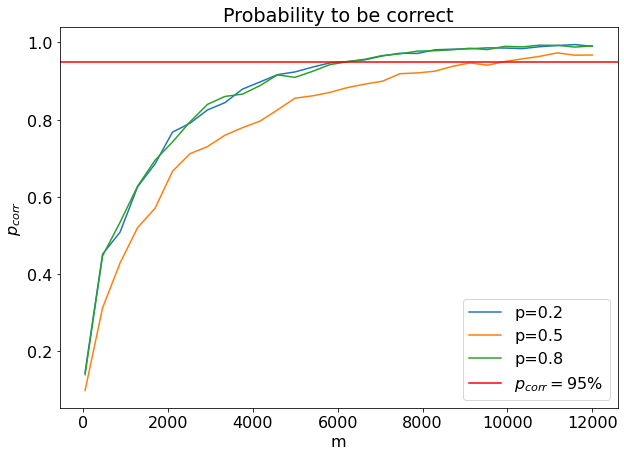

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.title('Probability to be correct')
plt.xlabel('m')
plt.ylabel(r'$p_{corr}$')
for i,p in enumerate(tab_p):
  plt.plot(tab_m,p_corr[i], label=r'p={}'.format(p))
plt.axhline(y=0.95, color='r', linestyle='-', label=r'$p_{corr} = 95\%$')
plt.legend()
plt.show()

As we expected, the curves intercept the horizontal line at values of $m$ which are much smaller that the theoretical $m^*$.

### $\color{purple}{\text{Bonus 2:}}$ Plot the behaviour of the probability of error $\mathbb{P}\big(\hat p \notin [p - 0.01, p + 0.01]\big)$ as a function of $p$ for values of $m\in[10,10^4]$, and compare it with the theoretical $m^*$.

In [ ]:
tab_m = [100,400,1600,6400]
tab_p = np.linspace(0,1,25)

In [ ]:
p_err = 1 - np.array([ np.array([ prob_corr(m, p) for p in tab_p ]) for m in tab_m])

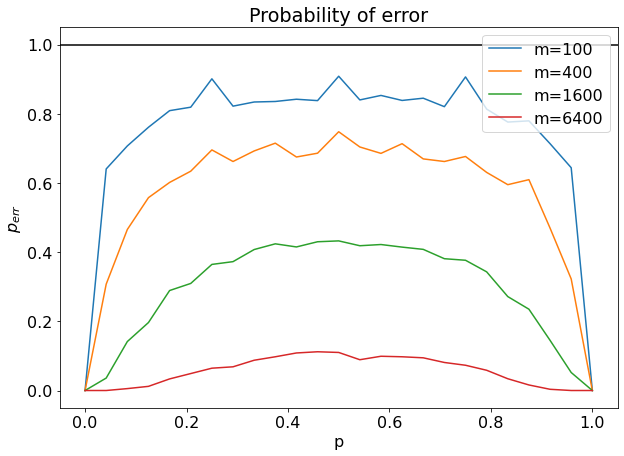

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.title('Probability of error')
plt.xlabel('p')
plt.ylabel(r'$p_{err}$')
for i,m in enumerate(tab_m):
  plt.plot(tab_p,p_err[i], label=r'm={}'.format(m))
plt.axhline(y=1, color='k', linestyle='-')
plt.legend()
plt.show()